In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread('opencv_logo.jpg',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
param1=150,param2=40,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
# cv2.imshow('detected circles',cimg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(cimg, 'gray')
plt.title('Detected Circles', fontsize=25)
# plt.subplot(133),plt.imshow(img, 'gray')
# plt.title('Contour', fontsize=25)
plt.show()

In [14]:
img = cv2.imread('coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

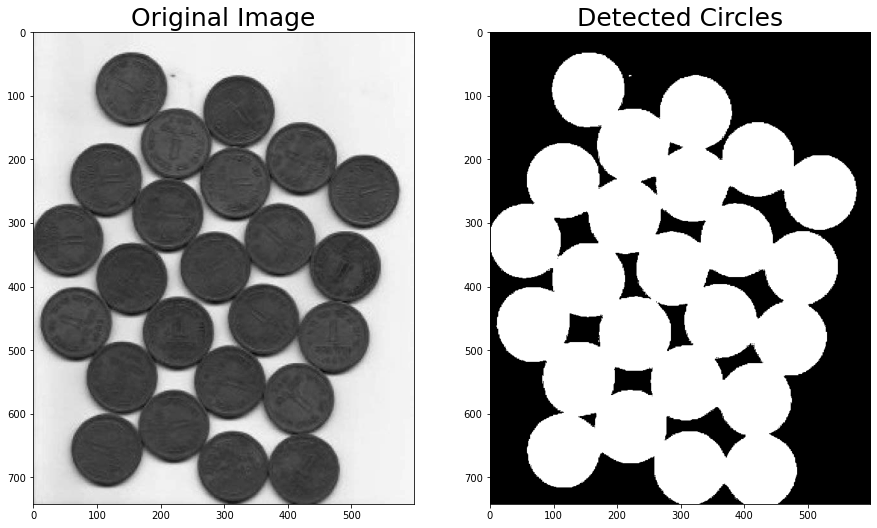

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(gray, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(thresh, 'gray')
plt.title('Detected Circles', fontsize=25)
plt.show()

In [16]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

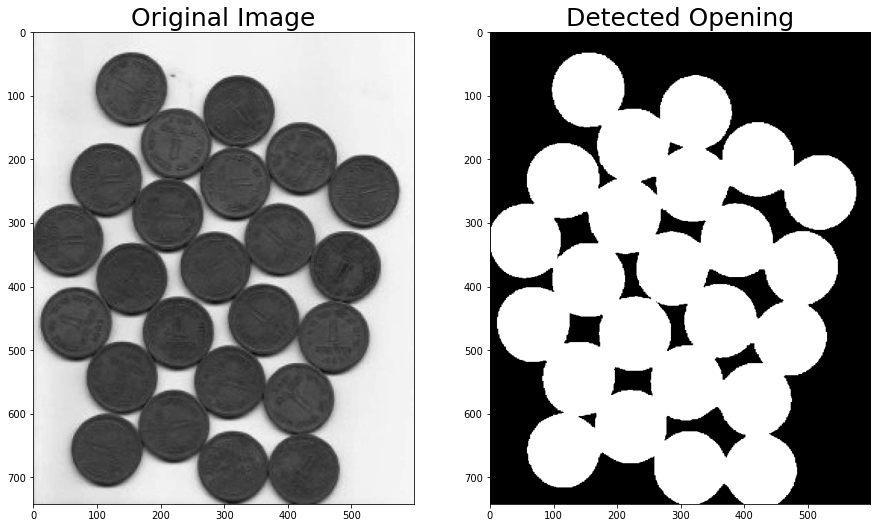

In [17]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(gray, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(opening, 'gray')
plt.title('Detected Opening', fontsize=25)
plt.show()

In [18]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)


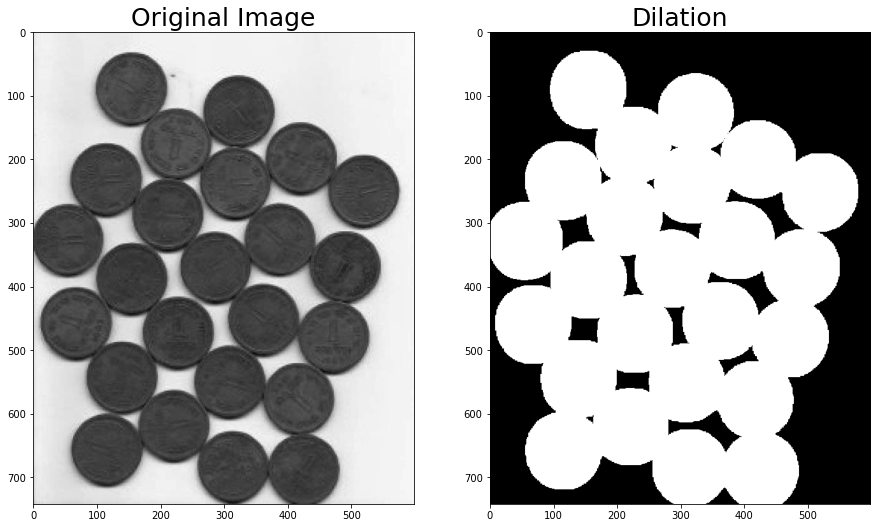

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(gray, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(sure_bg, 'gray')
plt.title('Dilation', fontsize=25)
plt.show()

In [21]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)


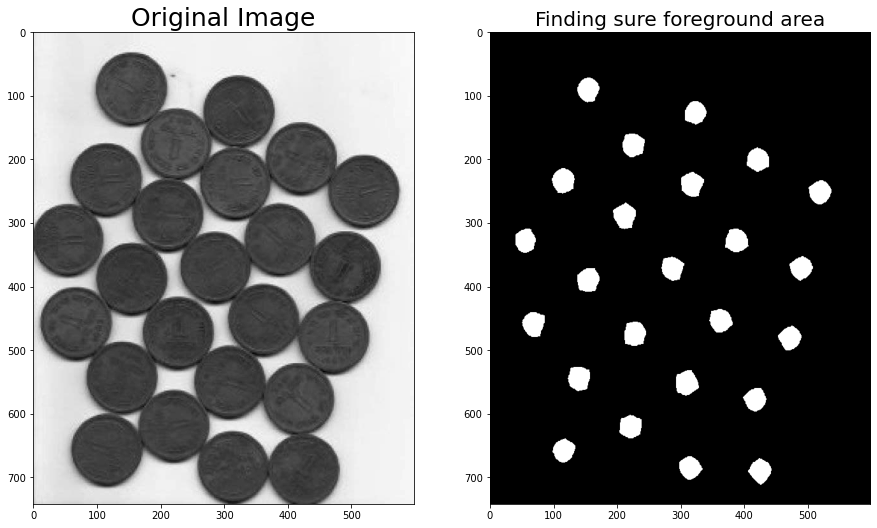

In [22]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(gray, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(sure_fg, 'gray')
plt.title('Finding sure foreground area', fontsize=20)
plt.show()

In [23]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

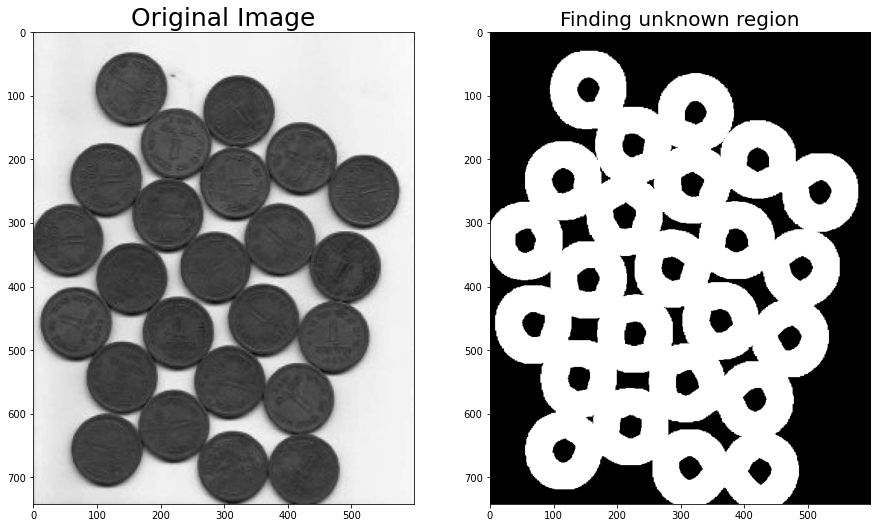

In [24]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(gray, 'gray')
plt.title('Original Image', fontsize=25)
plt.subplot(122),plt.imshow(unknown, 'gray')
plt.title('Finding unknown region', fontsize=20)
plt.show()

In [25]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [26]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

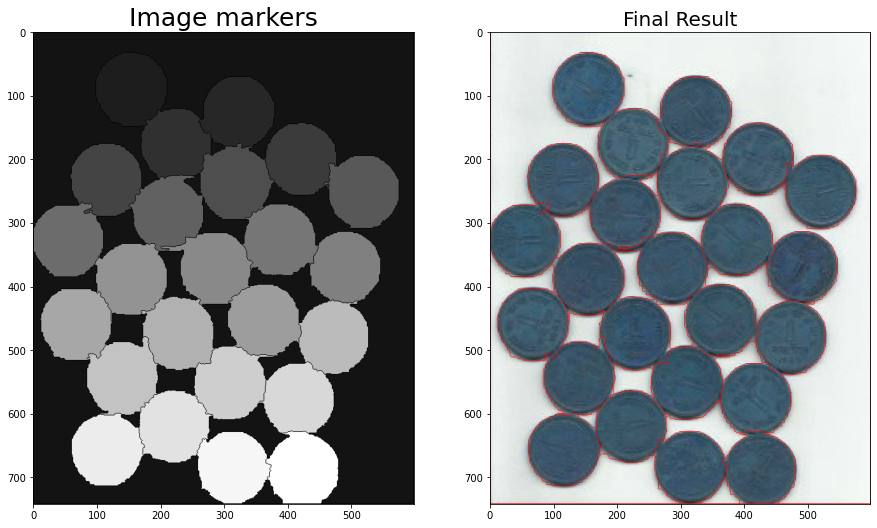

In [28]:
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(markers, 'gray')
plt.title('Image markers', fontsize=25)
plt.subplot(122),plt.imshow(img, 'gray')
plt.title('Final Result', fontsize=20)
plt.show()